#                                 Car Price Prediction Notebook

- Dataset:https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/discussion/335871

### Dataset Description
- CSV file - 19237 rows x 18 columns (Includes Price Columns as Target)

### Attributes
- ID
- Price: price of the care(Target Column)
- Levy
- Manufacturer
- Model
- Prod. year
- Category
- Leather interior
- Fuel type
- Engine volume
- Mileage
- Cylinders
- Gear box type
- Drive wheels
- Doors
- Wheel
- Color
- Airbags

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the CSV Data as Pandas DataFrame

In [7]:
car= pd.read_csv(r"D:\Data Study materials\car price\car_price_prediction.csv")
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


## Dataset information

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [8]:
car.shape

(19237, 18)

In [9]:
car.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [10]:
car.duplicated().sum()

313

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [12]:
car.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [13]:
car.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


## Insights

- There are duplicate values need to remove
- Mileage column has a km attached with it's values
- Levy, Engine volume,doors are object columns needs some preprocessing

# Exploring Dataset

In [14]:
print("Categories in 'Manufacturer' variable:     ",end=" " )
print(car['Manufacturer'].unique())

print("Categories in 'Category' variable:  ",end=" ")
print(car['Category'].unique())

print("Categories in 'Fuel type' variable:",end=" " )
print(car['Fuel type'].unique())

print("Categories in 'Gear box type' variable:     ",end=" " )
print(car['Gear box type'].unique())

print("Categories in 'Doors' variable:  ",end=" ")
print(car['Doors'].unique())

print("Categories in 'Drive wheels' variable:",end=" " )
print(car['Drive wheels'].unique())

print("Categories in 'Color' variable:",end=" " )
print(car['Color'].unique())


Categories in 'Manufacturer' variable:      ['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']
Categories in 'Category' variable:   ['Jeep' 'Hatchback' 'Sedan' 'Microbus' 'Goods wagon' 'Universal' 'Coupe'
 'Minivan' 'Cabriolet' 'Limousine' 'Pickup']
Categories in 'Fuel type' variable: ['Hybrid' 'Petrol' 'Diesel' 'CNG' 'Plug-in Hybrid' 'LPG' 'Hydrogen']
Categories in 'Gear box type' variable:      ['Automatic' 'Tiptronic' 'Variator' 'M

In [15]:
print("values in 'Price' column:  "  ,end=" ")
sorted(car['Price'])

values in 'Price' column:   

[1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 28,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 33,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 36,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 47,
 47,
 47,
 47,
 47,
 47,
 47,

In [16]:
print("Lower limit in Price:", car['Price'].mean() - 3*car['Price'].std())
print("Upper limit in Price:", car['Price'].mean() + 3*car['Price'].std())

Lower limit in Price: -553187.8818284475
Upper limit in Price: 590299.7362756067


In [17]:
print("'Price' lower than 500$ in columns:  "  ,len(car[car['Price'] < 300]))
print("'Price' greater than 30000$ in columns:  "  ,len(car[car['Price'] > 100000]))

'Price' lower than 500$ in columns:   894
'Price' greater than 30000$ in columns:   113


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

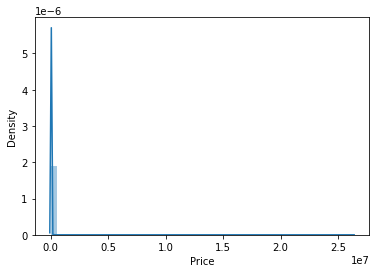

In [18]:
sns.distplot(car['Price'])

In [19]:
sum(car['Manufacturer'].value_counts() < 10)

24

In [20]:
len(car[car['Manufacturer'] == 'სხვა'])

2

In [21]:
car = car[car['Manufacturer'] != 'სხვა']

In [22]:
car['Levy'].value_counts()

-       5817
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [23]:
len(car[car['Levy'] == '-'])

5817

In [24]:
car['Fuel type'].value_counts()

Petrol            10149
Diesel             4035
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

In [25]:
car['Category'].value_counts()

Sedan          8736
Jeep           5472
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        305
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

In [26]:
car['Wheel'].value_counts()

Left wheel          17751
Right-hand drive     1484
Name: Wheel, dtype: int64

In [27]:
car['Gear box type'].value_counts()

Automatic    13514
Tiptronic     3102
Manual        1873
Variator       746
Name: Gear box type, dtype: int64

In [28]:
car['Doors'].value_counts()

04-May    18330
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [29]:
car['Drive wheels'].value_counts()

Front    12874
4x4       4058
Rear      2303
Name: Drive wheels, dtype: int64

In [30]:
car['Leather interior'].value_counts()

Yes    13953
No      5282
Name: Leather interior, dtype: int64

In [31]:
car['Cylinders'].value_counts()

4.0     14365
6.0      3462
8.0       991
5.0       169
3.0       107
2.0        42
1.0        38
12.0       38
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: Cylinders, dtype: int64

In [32]:
car['Color'].value_counts()

Black            5033
White            4488
Silver           3791
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: Color, dtype: int64

In [33]:
car['Model'].value_counts()

Prius                    1083
Sonata                   1079
Camry                     938
Elantra                   922
E 350                     542
                         ... 
C-MAX C-MAX                 1
X1 4X4                      1
Land Cruiser Prado RX       1
456                         1
Prius C aqua                1
Name: Model, Length: 1588, dtype: int64

In [34]:
sum(car['Model'].value_counts() < 10)

1372

In [35]:
car['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [36]:
car['Mileage'].value_counts(ascending=True)

207587 km      1
120456 km      1
42774 km       1
51476 km       1
47533 km       1
            ... 
100000 km    119
160000 km    120
150000 km    161
200000 km    183
0 km         721
Name: Mileage, Length: 7687, dtype: int64

In [37]:
len(car[car['Mileage'] == 0])

0

## Insights

- Have to remove outliers from Price, Manufacturer column
- Have to remove 'km' from Mileage column
- Drop dependent columns like Model
- Replace '-' values with mean in Levy column
- Engine volume have 'Turbo' in certain values, need separate column fpr Turbo
- Change the values in Doors columns
- Change '4x4' values in Drive wheels column
- Remove the 'Hydrogen' Fuel type

# Data Preprocessing

In [38]:
# Filter out rows where 'Price' is less than 500 or greater than 30,000
car = car[~((car['Price'] <= 500) | (car['Price'] >= 100000))]

C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

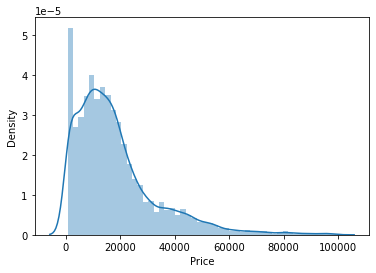

In [39]:
sns.distplot(car['Price'])

C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

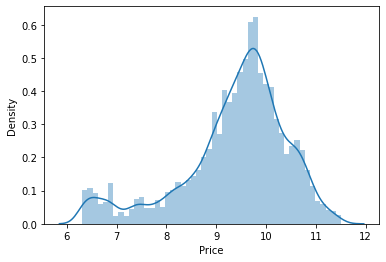

In [40]:
sns.distplot(np.log(car['Price']))

In [41]:
# Remove 'km' from Mileage and convert to integer
car['Mileage'] = car['Mileage'].str.replace(' km', '').astype(int)

In [42]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17457 entries, 0 to 19235
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17457 non-null  int64  
 1   Price             17457 non-null  int64  
 2   Levy              17457 non-null  object 
 3   Manufacturer      17457 non-null  object 
 4   Model             17457 non-null  object 
 5   Prod. year        17457 non-null  int64  
 6   Category          17457 non-null  object 
 7   Leather interior  17457 non-null  object 
 8   Fuel type         17457 non-null  object 
 9   Engine volume     17457 non-null  object 
 10  Mileage           17457 non-null  int32  
 11  Cylinders         17457 non-null  float64
 12  Gear box type     17457 non-null  object 
 13  Drive wheels      17457 non-null  object 
 14  Doors             17457 non-null  object 
 15  Wheel             17457 non-null  object 
 16  Color             17457 non-null  object

In [43]:
counts = car['Manufacturer'].value_counts()
mask = counts >= 10
selected_manufacturers = counts[mask].index
car = car.loc[car['Manufacturer'].isin(selected_manufacturers)]


In [44]:
car['Levy']=car['Levy'].replace('-',0)
car['Levy']=car['Levy'].astype(int)

In [45]:
car['Doors']=car['Doors'].str.replace('04-May','4')
car['Doors']=car['Doors'].str.replace('02-Mar','2')
car['Doors']=car['Doors'].str.replace('>5','5')

In [46]:
car['Doors']=car['Doors'].astype(int)

In [47]:
# Get the value counts of the 'Cylinders' column
counts = car['Cylinders'].value_counts()

# Filter the counts to keep only the values with a count of 5 or greater
filtered_counts = counts[counts >= 5]

# Get the list of values that meet the filter criteria
values_to_keep = filtered_counts.index.tolist()

# Filter the 'Cylinders' column to keep only the desired values
car = car[car['Cylinders'].isin(values_to_keep)]


In [48]:
car = car[car['Fuel type'] != 'Hydrogen']

In [49]:
car['Drive wheels']=car['Drive wheels'].str.replace('4x4','Others')

In [50]:
print("Maximun kms driven of a Car: "  ,car['Mileage'].max())
print("Minimum kms driven of a Car: "  ,car['Mileage'].min())
print("No of Cars with 0 kms driven:  "  ,len(car[car['Mileage'] ==0]))
print(" No of Cars with more than 100000 kms driven: "  ,len(car[car['Mileage'] > 100000]))

Maximun kms driven of a Car:  2147483647
Minimum kms driven of a Car:  0
No of Cars with 0 kms driven:   591
 No of Cars with more than 100000 kms driven:  10873


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

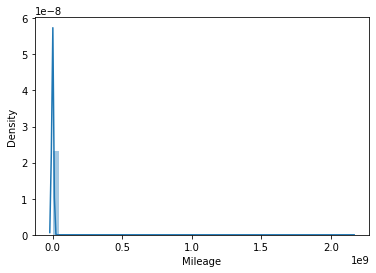

In [51]:
sns.distplot(car['Mileage'])

In [52]:
car['Mileage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 17397 entries, 0 to 19235
Series name: Mileage
Non-Null Count  Dtype
--------------  -----
17397 non-null  int32
dtypes: int32(1)
memory usage: 203.9 KB


C:\Users\Subhojit\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Mileage', ylabel='Count'>

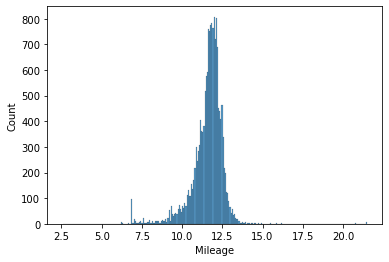

In [53]:
sns.histplot(np.log(car['Mileage']))

In [54]:
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,Others,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,Others,4,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,Others,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4


In [55]:
# Create a new column called 'Turbo' based on the 'Engine volume' column
car['Turbo'] = car['Engine volume'].str.contains('Turbo').astype(int)


In [56]:
car.sample(10)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
5065,45732089,50184,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,122497,4.0,Automatic,Front,4,Left wheel,Blue,4,0
1981,45539313,19444,0,TOYOTA,Prius,2013,Sedan,No,Hybrid,1.8,97386,4.0,Variator,Front,4,Left wheel,Red,8,0
12058,45764104,30734,2151,LEXUS,GX 470,2009,Jeep,Yes,Petrol,4.7,264339,8.0,Automatic,Others,4,Left wheel,Black,0,0
967,45503321,14269,0,HONDA,FIT Sport,2009,Hatchback,No,Petrol,1.5,198000,4.0,Automatic,Front,4,Left wheel,Blue,0,0
9128,45768086,26030,382,CHEVROLET,Volt,2017,Hatchback,Yes,Hybrid,1.5,52062,4.0,Automatic,Front,4,Left wheel,Blue,0,0
3688,45749892,11290,0,TOYOTA,Prius,2008,Sedan,No,Hybrid,1.5,173000,4.0,Variator,Front,4,Left wheel,Blue,8,0
12984,45802265,26594,777,HYUNDAI,H1,2014,Minivan,Yes,Diesel,2.5,179918,4.0,Automatic,Front,4,Left wheel,Silver,4,0
1947,45788812,11604,761,TOYOTA,Prius,2010,Sedan,No,Hybrid,1.8,154000,4.0,Automatic,Front,4,Left wheel,Grey,10,0
1650,45757747,627,586,LEXUS,CT 200h,2012,Hatchback,Yes,Hybrid,1.8,192683,4.0,Automatic,Front,4,Left wheel,White,0,0
7654,45610411,21326,1108,FORD,Mustang cabrio,2014,Cabriolet,No,Petrol,3.7,111431,6.0,Automatic,Rear,2,Left wheel,Grey,10,0


In [57]:
# Remove 'Turbo' suffix from values in 'Engine volume' column
car['Engine volume'] = car['Engine volume'].str.replace(' Turbo', '')

# Convert values in 'Engine volume' column to float
car['Engine volume'] = car['Engine volume'].astype(float)

In [58]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17397 entries, 0 to 19235
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17397 non-null  int64  
 1   Price             17397 non-null  int64  
 2   Levy              17397 non-null  int32  
 3   Manufacturer      17397 non-null  object 
 4   Model             17397 non-null  object 
 5   Prod. year        17397 non-null  int64  
 6   Category          17397 non-null  object 
 7   Leather interior  17397 non-null  object 
 8   Fuel type         17397 non-null  object 
 9   Engine volume     17397 non-null  float64
 10  Mileage           17397 non-null  int32  
 11  Cylinders         17397 non-null  float64
 12  Gear box type     17397 non-null  object 
 13  Drive wheels      17397 non-null  object 
 14  Doors             17397 non-null  int32  
 15  Wheel             17397 non-null  object 
 16  Color             17397 non-null  object

# EDA

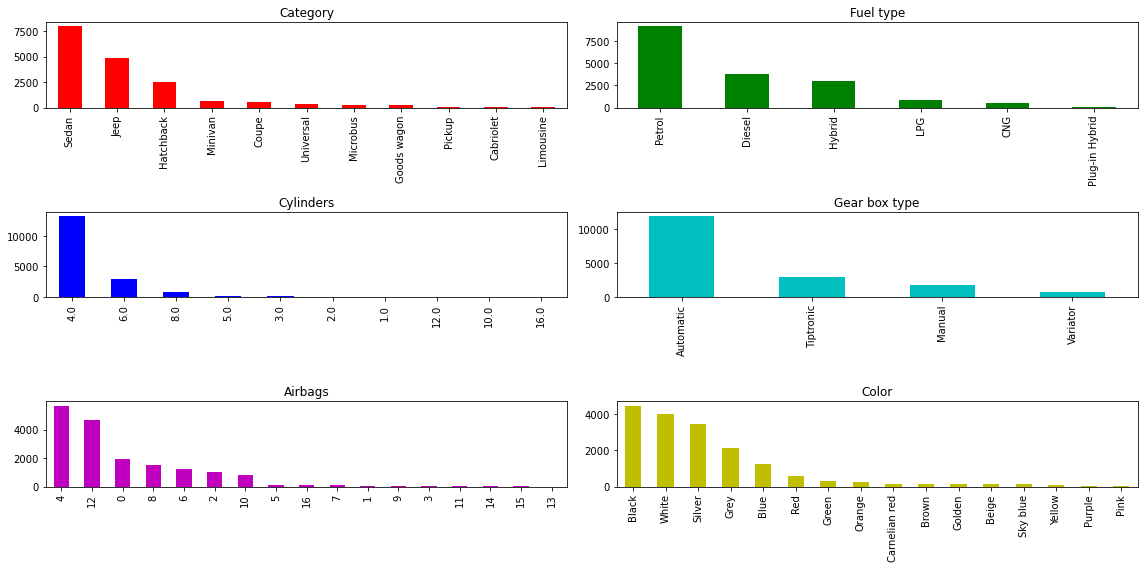

In [59]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))
columns = ['Category', 'Fuel type', 'Cylinders', 'Gear box type', 'Airbags', 'Color']
colors = ['r', 'g', 'b', 'c', 'm', 'y']

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    car[column].value_counts().plot(kind='bar', ax=axs[row, col], color=colors[i % len(colors)])
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()


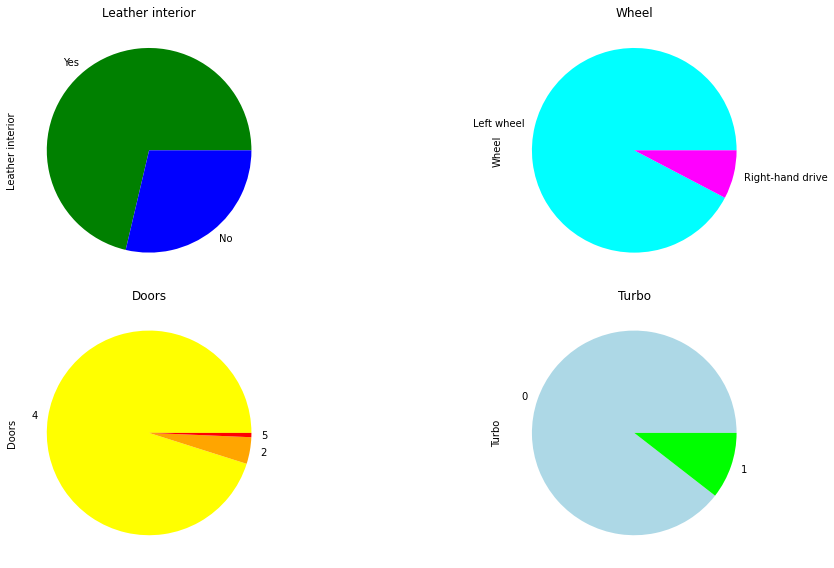

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
columns = ['Leather interior', 'Wheel', 'Doors', 'Turbo']
colors = [[ 'green','blue', 'purple'], ['cyan', 'magenta', 'pink'], ['yellow', 'orange','red'],['lightblue', 'lime', 'grey']]

for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    car[column].value_counts().plot(kind='pie', ax=axs[row, col], colors=colors[i])
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()


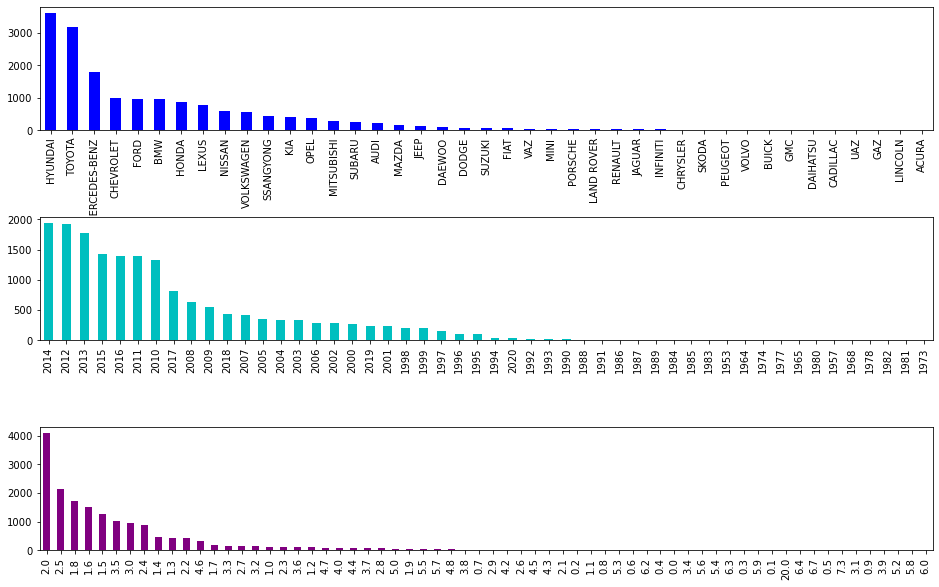

In [61]:
fig, axs = plt.subplots(nrows=3, figsize=(16,10))
car['Prod. year'].value_counts().plot(kind='bar',color='c',ax=axs[1])
car['Manufacturer'].value_counts().plot(kind='bar',color='b',ax=axs[0])
car['Engine volume'].value_counts().plot(kind='bar',color='purple',ax=axs[2])
plt.subplots_adjust(hspace=0.7)

C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogr

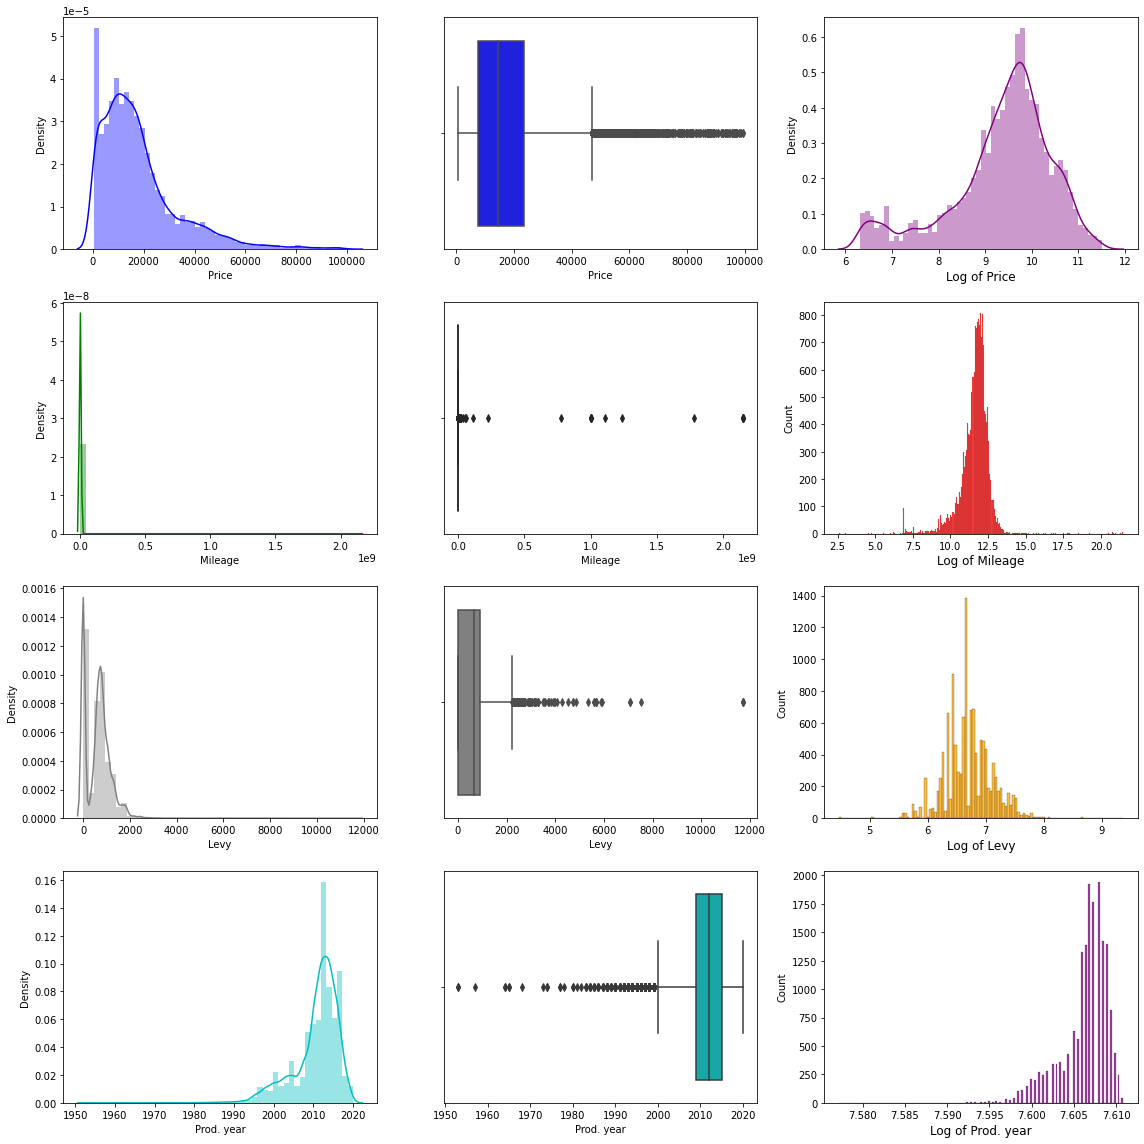

In [62]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16,16))

sns.distplot(car['Price'], color='blue', ax=axs[0, 0])
sns.boxplot(car['Price'], color='blue', ax=axs[0, 1])
sns.distplot(np.log(car['Price']), color='purple', ax=axs[0, 2])

sns.distplot(car['Mileage'], color='green', ax=axs[1, 0])
sns.boxplot(car['Mileage'], color='green', ax=axs[1, 1])
sns.histplot(np.log(car['Mileage']), color='red', ax=axs[1, 2])

sns.distplot(car['Levy'], color='grey', ax=axs[2, 0])
sns.boxplot(car['Levy'], color='grey', ax=axs[2, 1])
sns.histplot(np.log(car['Levy']), color='orange', ax=axs[2, 2])

sns.distplot(car['Prod. year'], color='c', ax=axs[3, 0])
sns.boxplot(car['Prod. year'], color='c', ax=axs[3, 1])
sns.histplot(np.log(car['Prod. year']), color='purple', ax=axs[3, 2])

axs[0, 2].set_xlabel('Log of Price', fontsize=12)
axs[1, 2].set_xlabel('Log of Mileage', fontsize=12)
axs[2, 2].set_xlabel('Log of Levy', fontsize=12)
axs[3, 2].set_xlabel('Log of Prod. year', fontsize=12)

plt.tight_layout()
plt.show()

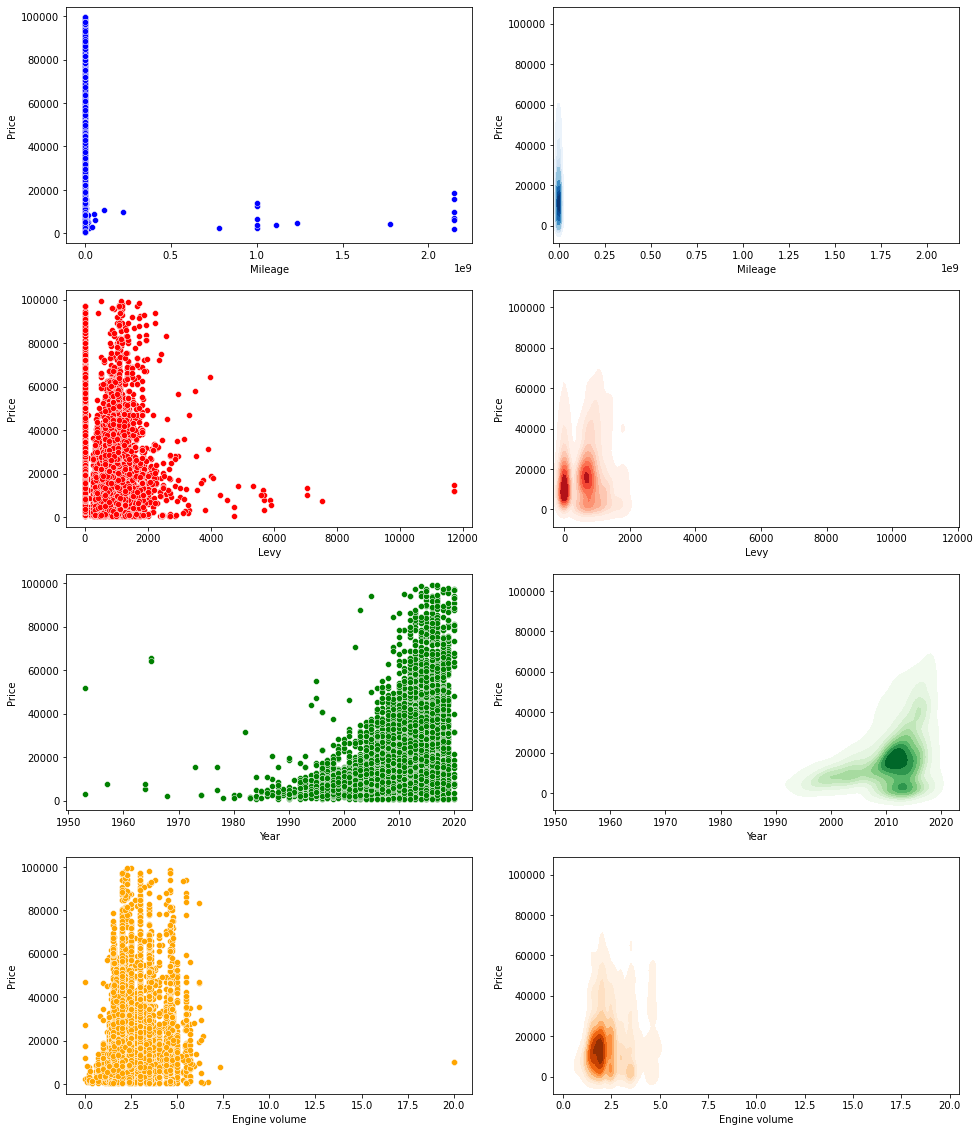

In [63]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,20))

sns.scatterplot(x=car['Mileage'], y=car['Price'], color='blue', ax=axs[0,0])
axs[0,0].set_xlabel('Mileage')
axs[0,0].set_ylabel('Price')
sns.kdeplot(x=car['Mileage'], y=car['Price'], shade=True, cmap='Blues', ax=axs[0,1])
axs[0,1].set_xlabel('Mileage')
axs[0,1].set_ylabel('Price')

sns.scatterplot(x=car['Levy'], y=car['Price'], color='red', ax=axs[1,0])
axs[1,0].set_xlabel('Levy')
axs[1,0].set_ylabel('Price')
sns.kdeplot(x=car['Levy'], y=car['Price'], shade=True, cmap='Reds', ax=axs[1,1])
axs[1,1].set_xlabel('Levy')
axs[1,1].set_ylabel('Price')

sns.scatterplot(x=car['Prod. year'], y=car['Price'], color='green', ax=axs[2,0])
axs[2,0].set_xlabel('Year')
axs[2,0].set_ylabel('Price')
sns.kdeplot(x=car['Prod. year'], y=car['Price'], shade=True, cmap='Greens', ax=axs[2,1])
axs[2,1].set_xlabel('Year')
axs[2,1].set_ylabel('Price')

sns.scatterplot(x=car['Engine volume'], y=car['Price'], color='orange', ax=axs[3,0])
axs[3,0].set_xlabel('Engine volume')
axs[3,0].set_ylabel('Price')
sns.kdeplot(x=car['Engine volume'], y=car['Price'], shade=True, cmap='Oranges', ax=axs[3,1])
axs[3,1].set_xlabel('Engine volume')
axs[3,1].set_ylabel('Price')

plt.show()


In [64]:
car.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo'],
      dtype='object')

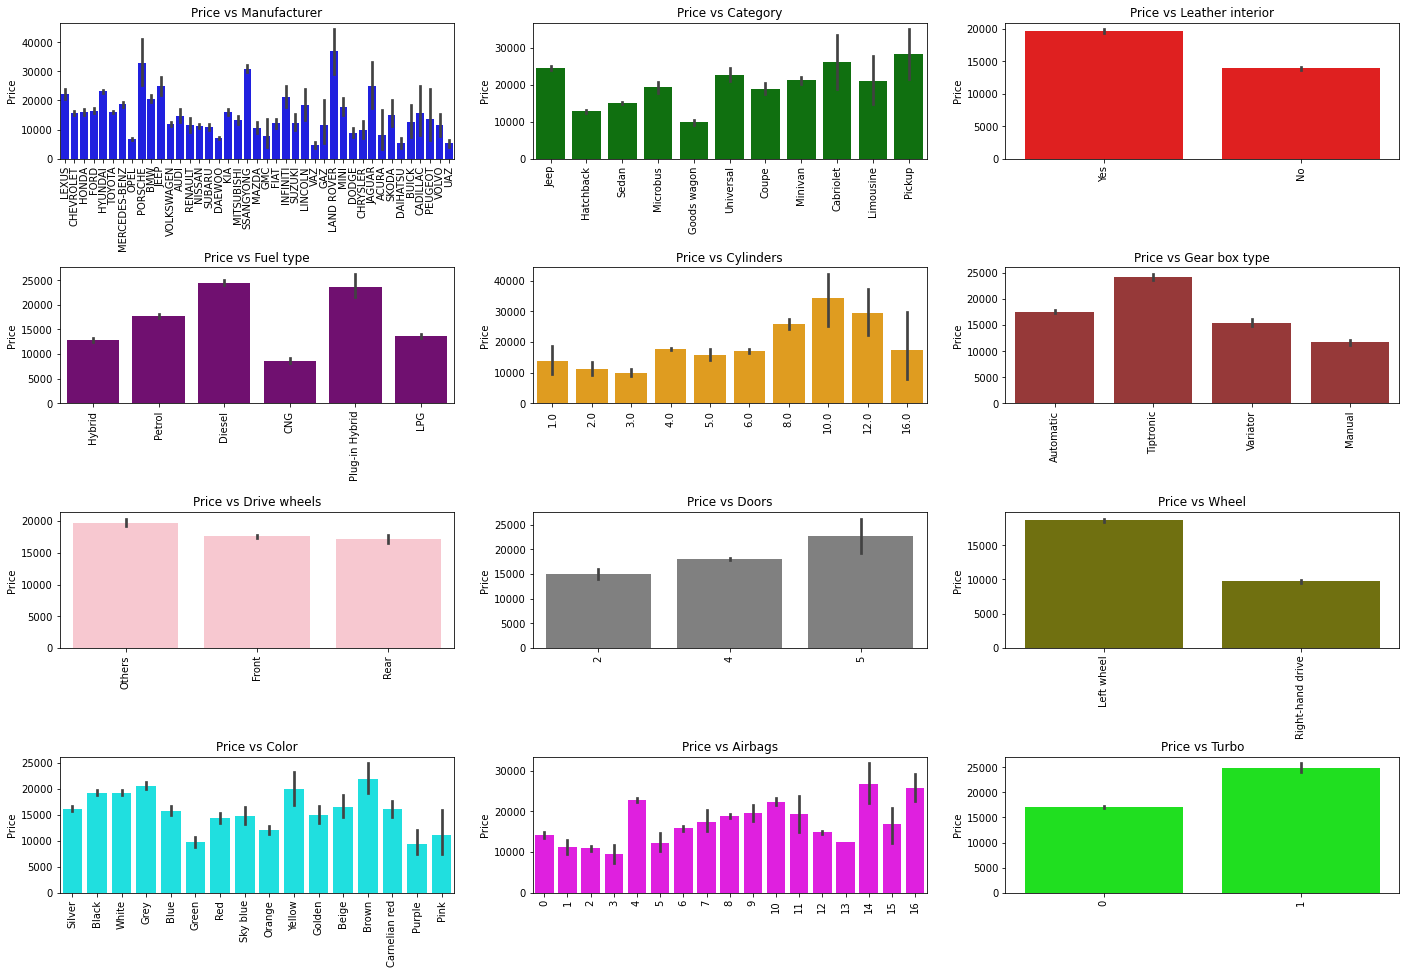

In [65]:
# Set up the subplot grid
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 16))

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Define the columns of interest and the corresponding colors
cols = ['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 
        'Doors', 'Wheel', 'Color', 'Airbags', 'Turbo']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'lime']

# Loop through the columns and create bar plots
for i, col in enumerate(cols):
    sns.barplot(x=col, y='Price', data=car, ax=axs[i], palette=[colors[i]])
    axs[i].set_title(f'Price vs {col}')
    axs[i].xaxis.set_tick_params(rotation=90)
    axs[i].set_xlabel('')

# Set the layout and display the plots
fig.subplots_adjust(hspace=0.8)
plt.show()


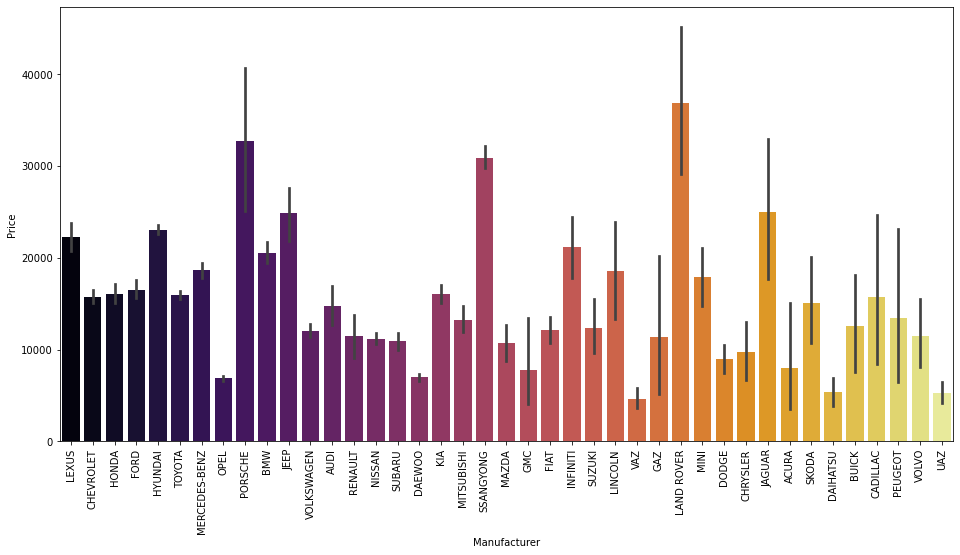

In [66]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=car['Manufacturer'], y=car['Price'], palette='inferno')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

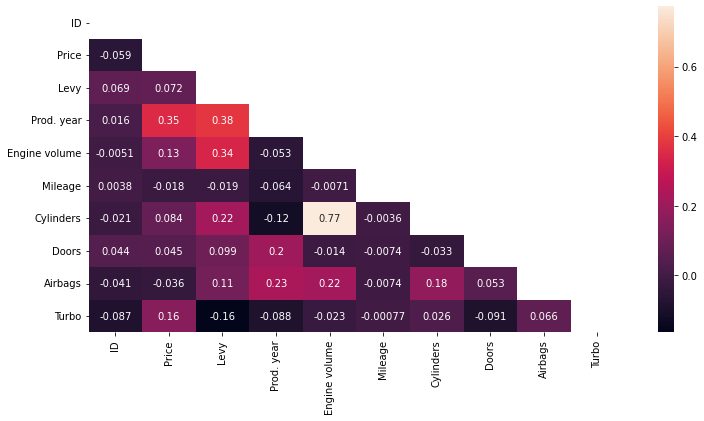

In [67]:
# Generate a correlation matrix
corr = car.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr))

# Create the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, mask=mask)

# Show the plot
plt.show()

In [68]:
car

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,Others,4,Left wheel,Silver,12,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,Others,4,Left wheel,Black,8,0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,Others,4,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12,0
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,1
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,0


In [69]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17397 entries, 0 to 19235
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                17397 non-null  int64  
 1   Price             17397 non-null  int64  
 2   Levy              17397 non-null  int32  
 3   Manufacturer      17397 non-null  object 
 4   Model             17397 non-null  object 
 5   Prod. year        17397 non-null  int64  
 6   Category          17397 non-null  object 
 7   Leather interior  17397 non-null  object 
 8   Fuel type         17397 non-null  object 
 9   Engine volume     17397 non-null  float64
 10  Mileage           17397 non-null  int32  
 11  Cylinders         17397 non-null  float64
 12  Gear box type     17397 non-null  object 
 13  Drive wheels      17397 non-null  object 
 14  Doors             17397 non-null  int32  
 15  Wheel             17397 non-null  object 
 16  Color             17397 non-null  object

- Should drop 5 values from Doors column
- Can do log Transformation of Price, Mileage and Levy 

# More preprocessing

In [71]:
car['Color'].values

array(['Silver', 'Black', 'Black', ..., 'Red', 'Grey', 'Black'],
      dtype=object)

In [72]:

car['Color'] = np.where(car['Color'].isin(['Silver', 'Black','White','Grey','Blue','Red','Orange','Green']), car['Color'], 'Others')


In [76]:
# Count the frequency of each manufacturer in the data
manufacturer_counts = car['Manufacturer'].value_counts()

# Find the names of manufacturers with less than 25 values
manufacturers_less_than_25 = manufacturer_counts[manufacturer_counts < 25].index.tolist()

# Print the names of the manufacturers with less than 25 values
manufacturers_less_than_25

['CHRYSLER',
 'SKODA',
 'PEUGEOT',
 'VOLVO',
 'BUICK',
 'GMC',
 'DAIHATSU',
 'CADILLAC',
 'UAZ',
 'GAZ',
 'LINCOLN',
 'ACURA']

In [77]:
car['Manufacturer'] = car['Manufacturer'].replace(manufacturers_less_than_25, 'Others')

In [78]:
car.sample(6)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
4015,45787282,36065,0,BMW,550,2012,Sedan,Yes,Petrol,4.4,145000,8.0,Tiptronic,Rear,4,Left wheel,White,12,1
15383,45732722,10036,639,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2.0,720227,4.0,Automatic,Front,4,Left wheel,Silver,4,0
18780,45802056,35269,934,HYUNDAI,H1,2015,Universal,Yes,Diesel,2.5,127027,4.0,Automatic,Front,4,Left wheel,White,4,0
1500,45787225,11604,0,FORD,Focus,2013,Sedan,Yes,Petrol,2.0,1000,4.0,Tiptronic,Front,4,Left wheel,White,6,0
10781,45211794,15994,1051,HYUNDAI,Sonata,2016,Sedan,No,Petrol,2.4,93000,4.0,Automatic,Front,4,Left wheel,White,12,0
11249,45804167,45542,891,HYUNDAI,Tucson,2016,Jeep,Yes,Diesel,2.0,88585,4.0,Automatic,Front,4,Left wheel,Black,4,0


# Model Building

In [79]:
X= car.drop(columns=['Price','ID','Model'])
y= np.log(car['Price'])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,FunctionTransformer
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13917 entries, 12788 to 14545
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              13917 non-null  int32  
 1   Manufacturer      13917 non-null  object 
 2   Prod. year        13917 non-null  int64  
 3   Category          13917 non-null  object 
 4   Leather interior  13917 non-null  object 
 5   Fuel type         13917 non-null  object 
 6   Engine volume     13917 non-null  float64
 7   Mileage           13917 non-null  int32  
 8   Cylinders         13917 non-null  float64
 9   Gear box type     13917 non-null  object 
 10  Drive wheels      13917 non-null  object 
 11  Doors             13917 non-null  int32  
 12  Wheel             13917 non-null  object 
 13  Color             13917 non-null  object 
 14  Airbags           13917 non-null  int64  
 15  Turbo             13917 non-null  int32  
dtypes: float64(2), int32(4), int64(2), o

In [83]:
X_train

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
12788,878,CHEVROLET,2009,Sedan,No,Petrol,1.8,53000,4.0,Tiptronic,Front,4,Left wheel,Grey,12,0
10226,1399,MERCEDES-BENZ,2010,Sedan,Yes,Diesel,3.5,239224,6.0,Automatic,Others,4,Left wheel,Black,12,0
7332,765,FORD,2015,Hatchback,No,Petrol,2.0,217600,4.0,Automatic,Front,4,Left wheel,White,8,0
4200,915,AUDI,2014,Hatchback,Yes,Petrol,3.0,401128,6.0,Automatic,Others,4,Left wheel,Grey,0,0
10706,418,CHEVROLET,2014,Hatchback,Yes,Petrol,1.2,131312,4.0,Automatic,Front,4,Left wheel,Blue,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13685,1292,HYUNDAI,2016,Sedan,Yes,LPG,3.0,200000,4.0,Automatic,Front,4,Left wheel,Silver,4,0
18791,0,JEEP,2001,Jeep,Yes,Petrol,4.7,228000,8.0,Automatic,Others,4,Left wheel,Blue,10,0
6296,1185,LEXUS,2009,Sedan,Yes,Petrol,2.5,126715,4.0,Automatic,Front,4,Left wheel,White,4,0
8864,917,BMW,2013,Sedan,Yes,Petrol,3.0,136000,6.0,Tiptronic,Rear,4,Left wheel,White,12,1


# Linear Regression

In [84]:
lr_step1 = ColumnTransformer(transformers=[
    ('lr_col_tnf', OneHotEncoder(sparse=False,drop='first'), [1,3,4,5,9,10,12,13]),
    ('log_tnf', FunctionTransformer(np.log1p), [0,7])
], remainder='passthrough')

lr_step2 = LinearRegression()

pipe_lr = Pipeline([
    ('lr_step1',lr_step1),
    ('lr_step2',lr_step2)
])

pipe_lr.fit(X_train,y_train)

y_pred = pipe_lr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.3489162744295402
MAE 0.6238549656715188


## Ridge Regression

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.3316590802997388
MAE 0.6315480708460801


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.96507e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Lasso Regression

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.3269839141688372
MAE 0.6329365637158816


## KNN

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.25310213381163704
MAE 0.6122389444090828


# Random Forest

In [103]:
rf_step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

rf_step2 = RandomForestRegressor(n_estimators=300,
                              random_state=3,
                              max_samples=1.0,
                              max_features=0.75,
                              max_depth=15)

pipe_rf = Pipeline([
    ('rf_step1',rf_step1),
    ('rf_step2',rf_step2)
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7659478275681334
MAE 0.3160239952825891


# Random Forest Grid Search CV

In [100]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the pipeline
param_grid = {
    'rf_step2__n_estimators': [100, 200, 300],
    'rf_step2__max_depth': [5, 10, 15],
    'rf_step2__max_samples': [0.5, 0.75, 1.0],
    'rf_step2__max_features': [0.5, 0.75, 1.0]
}

# Create a GridSearchCV object with the pipeline and parameter grid
grid_rf = GridSearchCV(pipe_rf, param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_rf.fit(X_train, y_train)

# Print the best parameter combination and corresponding score
print("Best parameter combination: ", grid_rf.best_params_)
print("Best score: ", grid_rf.best_score_)


Best parameter combination:  {'rf_step2__max_depth': 15, 'rf_step2__max_features': 0.75, 'rf_step2__max_samples': 1.0, 'rf_step2__n_estimators': 300}
Best score:  0.7602748296531526


## Extra Trees

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6111468954125989
MAE 0.4487149253073519


## AdaBoost

In [94]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.39195109075853163
MAE 0.6406683073319507


## Gradient Boost

In [96]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.6696921743563597
MAE 0.40994895984729635


## XgBoost

In [97]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.712687804691057
MAE 0.3797220660019847


## Voting Regressor

In [98]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7311125285559448
MAE 0.36008963864255755


# Stacking

In [95]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

st_step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[1,3,4,5,9,10,12,13])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=300,random_state=3,max_samples=1.0,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=200,learning_rate=0.3,max_depth=20))
]

st_step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=10))

pipe_st = Pipeline([
    ('st_step1',st_step1),
    ('st_step2',st_step2)
])

pipe_st.fit(X_train,y_train)

y_pred = pipe_st.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7818553342729476
MAE 0.28746887151070594


## Insights

- Ensemble techniques Such as Boosting and Stacking is giving better results here
- Performing GridSearch with Random Forest has improved prediction results

### Random Forest Model feature importance 

In [105]:
feat_importance = pipe_rf.named_steps['rf_step2'].feature_importances_

### Get list of column names

In [106]:
col_names = pipe_rf.named_steps['rf_step1'].get_feature_names_out(input_features=X_train.columns)

In [108]:
# Create a DataFrame to store feature importance and column names
feat_imp_df = pd.DataFrame({'feature': col_names, 'importance': feat_importance})

# Sort the DataFrame by feature importance in descending order
feat_imp_df = feat_imp_df.sort_values('importance', ascending=False)

# Top 10 features and their importance scores
feat_imp_df.head(10)

,feature,importance
65,remainder__Airbags,0.184098
60,remainder__Prod. year,0.157985
62,remainder__Mileage,0.114125
59,remainder__Levy,0.112907
46,col_tnf__Gear box type_Tiptronic,0.110745
61,remainder__Engine volume,0.063550
39,col_tnf__Leather interior_Yes,0.036052
66,remainder__Turbo,0.022687
32,col_tnf__Category_Jeep,0.020980
26,col_tnf__Manufacturer_TOYOTA,0.013345


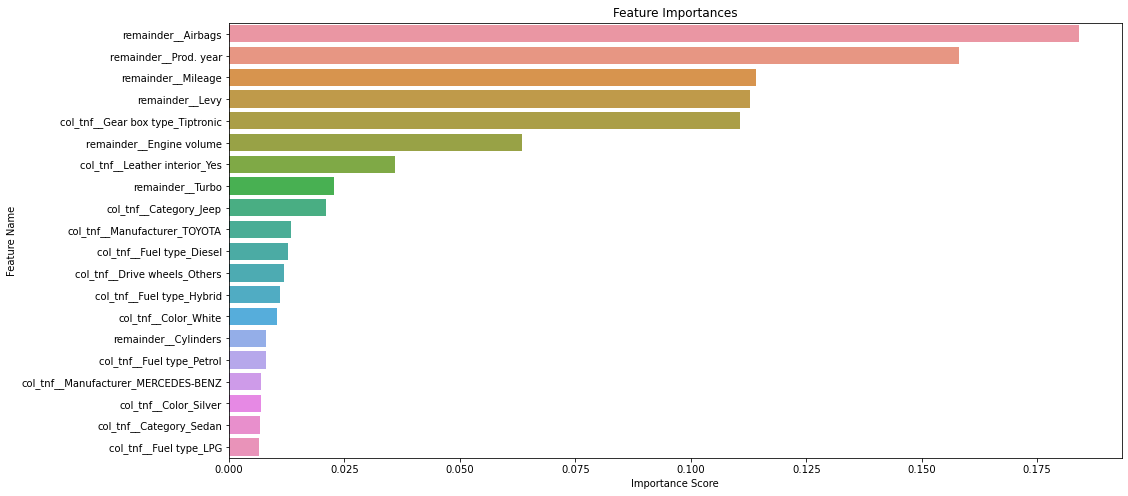

In [110]:
# Plot the feature importances
plt.figure(figsize=(16,8))
sns.barplot(x='importance', y='feature', data=feat_imp_df.head(20))
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.show()

# Exporting the Model as pickle file

In [111]:
import pickle

In [112]:
#pickle.dump(pipe_rf,open('new car pipe.pkl','wb'))

In [113]:
#pickle.dump(X_train,open('new car df.pkl', 'wb'))